# phase 2 insecticide resistance map - PBO?

In [1]:
%run setup.ipynb
%run ../agam-report-base/src/python/ag1k/phase2_ar1.py
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import cartopy; print('cartopy', cartopy.__version__)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import seaborn as sns

cartopy 0.17.0


In [2]:
df_meta = pd.read_csv('../meta/ag1000g/phase2_samples.meta.txt', sep='\t')
df_meta.columns

Index(['ox_code', 'src_code', 'population', 'country', 'location', 'site',
       'contributor', 'contact', 'year', 'm_s', 'sex', 'n_sequences',
       'mean_coverage', 'ebi_sample_acc', 'latitude', 'longitude'],
      dtype='object')

In [3]:
df_meta

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0051-C,Twifo_Praso__C1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,99910300,33.33,ERS311871,5.60858,-1.54926
3,AA0052-C,Twifo_Praso__F2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,100899280,32.29,ERS311879,5.60858,-1.54926
4,AA0053-C,Twifo_Praso__A4,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,104791234,34.14,ERS311887,5.60858,-1.54926
5,AA0063-C,Twifo_Praso__D1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,90062282,29.33,ERS311872,5.60858,-1.54926
6,AA0064-C,Twifo_Praso__G2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,100028190,31.61,ERS311880,5.60858,-1.54926
7,AA0075-C,Twifo_Praso__F1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,98566392,31.67,ERS311873,5.60858,-1.54926
8,AA0076-C,Twifo_Praso__B3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,92182496,29.91,ERS311881,5.60858,-1.54926
9,AA0077-C,Twifo_Praso__C4,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,89362286,27.69,ERS311889,5.60858,-1.54926


# map fun

In [4]:
crs_lonlat = ccrs.PlateCarree()
ratios = np.asarray([0.5, 0.5])
sum(ratios)

1.0

## Let's try using the ecosystem layer from phase 1
http://www.aag.org/cs/publications/special/map_african_ecosystems

In [5]:
import humanize
from humanize import naturalsize, intcomma, intword

In [6]:
import os

In [7]:
#!conda install -c conda-forge gdal

In [8]:
import os
import gdal
import ogr
import osr
import gdalnumeric
import gdalconst

In [9]:
from osgeo import osr, gdal

In [10]:
gdal.__version__

'2.4.1'

In [11]:
#downloaded data from http://rmgsc.cr.usgs.gov/outgoing/ecosystems/AfricaData/
data_dir = '/home/chris/data/Africa_IVC/'

In [12]:
!ls -hal {data_dir}

total 904M
drwxrwxr-x 2 chris chris 4.0K Nov 22  2018 .
drwxrwxrwx 6 chris chris 4.0K Mar 27 11:40 ..
-rwxrwxrwx 1 chris chris   82 Mar 20  2013 Africa_IVC_20130316_final_MG.tfw
-rwxrwxrwx 1 chris chris 643M Mar 20  2013 Africa_IVC_20130316_final_MG.tif
-rwxrwxrwx 1 chris chris  50K Mar 20  2013 Africa_IVC_20130316_final_MG_tif_arc10_1.lyr
-rwxrwxrwx 1 chris chris  49K Apr  2  2013 Africa_IVC_20130316_final_MG_tif_arc10.lyr
-rwxrwxrwx 1 chris chris  476 Apr  2  2013 Africa_IVC_20130316_final_MG.tif.aux.xml
-rwxrwxrwx 1 chris chris 260M Apr  2  2013 Africa_IVC_20130316_final_MG.tif.ovr
-rw-rw-r-- 1 chris chris  45K May 21 12:00 Africa_IVC_20130316_final_MG.tif.vat.csv
-rwxrwxrwx 1 chris chris 393K Mar 20  2013 Africa_IVC_20130316_final_MG.tif.vat.dbf
-rwxrwxrwx 1 chris chris 3.1K Mar 27  2013 Africa_IVC_20130316_final_MG.tif.xml
-rwxrwxrwx 1 chris chris 9.1K Mar 27  2013 Africa_IVC_20130316_final_MG.xml
-rwxrwxrwx 1 chris chris  69K Mar 23  2013 African and Malagasy Veg_Macrogroups_2013

In [13]:
#geoTIFF
dataset = gdal.Open(os.path.join(data_dir, 'Africa_IVC_20130316_final_MG.tif'))

In [14]:
dataset

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f6bfadff930> >

In [15]:
#what spatial reference system has been used?
proj_wkt = dataset.GetProjection()
#wkt = Well Known Text markup language for representing vector geometry on a map.
print(proj_wkt)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


In [16]:
#conver wkt into spatial reference object
proj = osr.SpatialReference()
proj.ImportFromWkt(proj_wkt)
print(proj)

GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]


In [17]:
#find image boundaries
geo_transform = dataset.GetGeoTransform()
geo_transform
#these numbers define the transformation from pixel raster space to coordinate space.
#of 2 and 4 are zero then image is 'north up'...

(-26.00013888888887,
 0.0008333333333,
 0.0,
 38.00013888888887,
 0.0,
 -0.0008333333332999999)

In [18]:
origin_x = geo_transform[0]
origin_y = geo_transform[3]
pixel_width = geo_transform[1]
pixel_height = geo_transform[5]

In [19]:
origin_x, origin_y

(-26.00013888888887, 38.00013888888887)

#### raster info

In [20]:
# how big?
n_cols = dataset.RasterXSize
n_rows = dataset.RasterYSize
n_cols, n_rows

(108000, 87600)

In [21]:
# how many bands?
dataset.RasterCount

1

In [22]:
band = dataset.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f6bfadfff90> >

In [23]:
# what data type?
gdal.GetDataTypeName(band.DataType)

'Int32'

In [24]:
#big, too big to fit in memory
humanize.naturalsize(n_cols * n_rows * 4)

'37.8 GB'

#### need a colour table - we have one in ArcGIS.lyr format that is no use, but we can make one from the .dbf file

In [25]:
!dbview {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.dbf --browse --trim --description > \
    {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.csv

In [26]:
!head -n23 {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.csv

Field Name	Type	Length	Decimal Pos
Value     	  N	    9	    0
Count     	  F	   19	   11
hierarchy 	  C	  254	    0
class     	  C	  254	    0
subclass  	  C	  254	    0
formation 	  C	  254	    0
formation 	  C	  254	    0
division k	  C	  254	    0
division c	  C	  254	    0
Division  	  C	  254	    0
Mgkey     	  C	  254	    0
Mg code   	  C	  254	    0
Mg name fi	  C	  254	    0
Macrogroup	  C	  254	    0
Mapped    	  N	    4	    0
Red       	  F	   13	   11
Green     	  F	   13	   11
Blue      	  F	   13	   11
Opacity   	  F	   13	   11
0:2.73051336800e+009:::::::::::::0:0.00000e+000:0.00000e+000:0.00000e+000:1.00000e+000:
1:3.36479726000e+008:1.A.2.Fd:1 Forest to Open Woodland:1.A Tropical Forest:1.A.2:1.A.2 Tropical Lowland Humid Forest:D147:1.A.2.Fd:1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest:MA001:1.A.2.Fd.1:1.A.2.Fd.1-Guineo-Congolian Evergreen Rainforest:Guineo-Congolian Evergreen Rainforest:1:0.00000e+000:4.58824e-001:3.92157e-002:1.00000e+000:
3:3.99018

In [27]:
# extract the field names
vat_fn = os.path.join(data_dir, 'Africa_IVC_20130316_final_MG.tif.vat.csv')
tbl_descr = etl.fromtsv(vat_fn).head(19).convertall('strip')
tbl_descr.displayall()

0|Field Name,1|Type,2|Length,3|Decimal Pos
Value,N,9,0
Count,F,19,11
hierarchy,C,254,0
class,C,254,0
subclass,C,254,0
formation,C,254,0
formation,C,254,0
division k,C,254,0
division c,C,254,0
Division,C,254,0


In [28]:
# extract the data
hdr_colors = tbl_descr.values('Field Name').list()
tbl_colors = (etl
    .fromcsv(vat_fn, delimiter=':')
    .skip(20)  # skip the field descriptions
    .pushheader(hdr_colors)
    .cat()  # remove empty cells beyond columns
    .convert('Value', int)
    .convert(['Count', 'Red', 'Green', 'Blue', 'Opacity'], float)
)
tbl_colors

0|Value,1|Count,2|hierarchy,3|class,4|subclass,5|formation,6|formation,7|division k,8|division c,9|Division,10|Mgkey,11|Mg code,12|Mg name fi,13|Macrogroup,14|Mapped,15|Red,16|Green,17|Blue,18|Opacity
0,2730513368.0,,,,,,,,,,,,,0,0.0,0.0,0.0,1.0
1,336479726.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA001,1.A.2.Fd.1,1.A.2.Fd.1-Guineo-Congolian Evergreen Rainforest,Guineo-Congolian Evergreen Rainforest,1,0.0,0.458824,0.0392157,1.0
3,39901826.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA003,1.A.2.Fd.3,1.A.2.Fd.3-Guineo-Congolian Semi-Deciduous Rainforest,Guineo-Congolian Semi-Deciduous Rainforest,1,0.0666667,0.482353,0.0470588,1.0
4,3666429.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA004,1.A.2.Fd.4,1.A.2.Fd.4-Guineo-Congolian Littoral Rainforest,Guineo-Congolian Littoral Rainforest,1,0.027451,0.431373,0.0392157,1.0
5,1398415.0,1.A.2.Fe,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D148,1.A.2.Fe,1.A.2.Fe Malagasy Evergreen & Semi-Evergreen Forest,MA005,1.A.2.Fe.5,1.A.2.Fe.5-Madagascar Evergreen Littoral Forest,Madagascar Evergreen Littoral Forest,1,0.054902,0.588235,0.184314,1.0


In [29]:
f = etl.select(tbl_colors, "{Value} == 133")
f

0|Value,1|Count,2|hierarchy,3|class,4|subclass,5|formation,6|formation,7|division k,8|division c,9|Division,10|Mgkey,11|Mg code,12|Mg name fi,13|Macrogroup,14|Mapped,15|Red,16|Green,17|Blue,18|Opacity
133,159826171.0,2.A.1.Fi,2 Shrubland & Grassland,"2.A Tropical Grassland, Savanna & Shrubland",2.A.1,2.A.1,D131,2.A.1.Fi,2.A.1.Fi Sudano-Sahelian Dry Savanna,MA133,2.A.1.Fi.3,2.A.1.Fi.3-Sudano-Sahelian Treed Savanna,Sudano-Sahelian Treed Savanna,1,0.670588,0.803922,0.4,1.0


#### now build matplotlib colour map

In [30]:
max_class = tbl_colors.values('Value').max()
max_class

971

In [31]:
colors = np.zeros((max_class+1, 3), dtype=float)
for i, r, g, b in tbl_colors.cut('Value', 'Red', 'Green', 'Blue').data():
    colors[i] = r, g, b

In [32]:
colors.shape

(972, 3)

In [33]:
# check all numbers processed ok
np.count_nonzero(np.isnan(colors))

0

In [34]:
# fix the zero colour to be white
colors[0] = 1, 1, 1

In [76]:
colors

array([[1.       , 1.       , 1.       ],
       [0.       , 0.458824 , 0.0392157],
       [0.       , 0.       , 0.       ],
       ...,
       [1.       , 0.882353 , 0.882353 ],
       [0.       , 0.       , 0.       ],
       [1.       , 0.921569 , 0.745098 ]])

In [87]:
color_map = mpl.colors.ListedColormap(colors)

In [82]:
color_map = color_map.monochrome

In [ ]:

# # Choose colormap
# cmap = pl.cm.RdBu

# # Get the colormap colors
# my_cmap = cmap(np.arange(cmap.N))

# # Set alpha
# my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# # Create new colormap
# my_cmap = ListedColormap(my_cmap)

In [75]:
# color_map[:,-1] = np.linspace(0, 1, color_map.N)

TypeError: 'ListedColormap' object does not support item assignment

#### extract raster data

In [83]:
#load GoTiff into numpy array - too big to load into mem so need to resample
#GDAL allows size of output buffer and resampling algo to be specified at extraction
data = dataset.ReadAsArray(buf_xsize=n_cols//100, buf_ysize=n_rows//100, 
                           resample_alg=gdal.GRIORA_Mode)
data

array([[-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       ...,
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648]], dtype=int32)

In [84]:
data.shape

(876, 1080)

In [85]:
#check data is correct before we do any plotting
# set all missing data as 0 class
data[data < 0] = 0

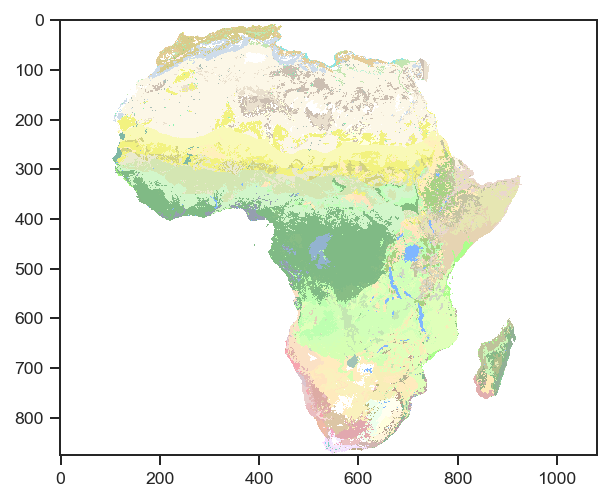

In [88]:
plt.imshow(data, cmap=color_map, alpha=0.5);

### plot with cartopy

In [40]:
extent_lonlat = (
    origin_x, 
    origin_x + (pixel_width * dataset.RasterXSize),
    origin_y + (pixel_height * dataset.RasterYSize),
    origin_y
)

In [41]:
crs_lonlat = ccrs.PlateCarree()

In [42]:
#level of granularity country
df_meta.country.unique()

array(['Ghana', 'Burkina Faso', 'Uganda', 'Gambia, The', 'Guinea-Bissau',
       'Kenya', 'Cameroon', 'France', 'Equatorial Guinea', 'Angola',
       'Gabon', 'Guinea', "Cote d'Ivoire"], dtype=object)

In [43]:
df_meta.population.unique()

array(['GHcol', 'GHgam', 'BFgam', 'BFcol', 'UGgam', 'GM', 'GW', 'KE',
       'CMgam', 'FRgam', 'GQgam', 'AOcol', 'GAgam', 'GNgam', 'GNcol',
       'CIcol'], dtype=object)

In [44]:
plotpop = []
for p in list(df_meta.population):
    if p.startswith('GN'):
        plotpop.append('GN')
    else:
        plotpop.append(p)

In [45]:
df_meta['plotpop'] = plotpop

In [46]:
df_meta.plotpop.unique()

array(['GHcol', 'GHgam', 'BFgam', 'BFcol', 'UGgam', 'GM', 'GW', 'KE',
       'CMgam', 'FRgam', 'GQgam', 'AOcol', 'GAgam', 'GN', 'CIcol'],
      dtype=object)

In [47]:
#get an average lonlat for each country
cy_nm = df_meta.plotpop.unique()
cy_lon = [np.mean(df_meta[df_meta.plotpop == c].longitude.unique()) for c in cy_nm]
cy_lat = [np.mean(df_meta[df_meta.plotpop == c].latitude.unique()) for c in cy_nm]

#get the number of samples in each pop
cy_num = [df_meta[df_meta.plotpop == c].shape[0] for c in cy_nm]

In [48]:
cy_num

[55, 12, 92, 75, 112, 65, 91, 48, 297, 24, 9, 78, 69, 44, 71]

### insecticide resistance loci
- for each sample kdr/cyp/both/none

In [49]:
#eric's cyp data
df_c6 = pd.read_csv("../data/cyp6aap.csv", sep="\t")
df_c9 = pd.read_csv("../data/cyp9k1.csv", sep="\t")
df_c9.head()

,Unnamed: 0,Dup0,Dup1,Dup2,Dup3,Dup4,Dup5,Dup6,Dup7,Dup8,Dup9,Dup10,Dup11,Dup12,Dup13,Dup14,Dup15,Dup16,Any
0,AA0040_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AA0041_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AA0042_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AA0043_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AA0044_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
all_cyp_int = []
for a, b in zip(list(df_c9.Any), list(df_c6.Any)):
    if a == 0 and b == 0:
        all_cyp_int.append(0)
    else:
        all_cyp_int.append(1)

In [51]:
#kdr data from genotypes F/S per indiv
#L1014F  SNP     2L      2422652
#L1014S  SNP     2L      2422651
callset = phase2_ar1.callset_pass_biallelic
gen = allel.GenotypeDaskArray(callset['2L']['calldata/genotype'])
pos = allel.SortedIndex(callset['2L']['variants']['POS'][:])

In [52]:
F = gen[pos.locate_range(2422652, 2422652)]
S = gen[pos.locate_range(2422651, 2422651)]

In [53]:
all_kdr = np.asarray(F.is_het()).flatten() + np.asarray(F.is_hom_alt()).flatten() + np.asarray(S.is_het()).flatten() + np.asarray(S.is_hom_alt()).flatten()
all_kdr_int = [int(a) for a in all_kdr]
np.count_nonzero(all_kdr_int)

904

In [54]:
just_k = []
just_c = []
both = []
none = []

for k, c in zip(all_kdr_int, all_cyp_int):
    if k == 1 and c == 0:
        just_k.append(1)
        just_c.append(0)
        both.append(0)
        none.append(0)
    if k == 0 and c == 1:
        just_k.append(0)
        just_c.append(1)
        both.append(0)
        none.append(0)
    if k == 1 and c == 1:
        just_k.append(0)
        just_c.append(0)
        both.append(1)
        none.append(0)
    if k == 0 and c == 0:
        just_k.append(0)
        just_c.append(0)
        both.append(0)
        none.append(1)

In [55]:
len(just_k), len(just_c), len(both), len(none), 

(1142, 1142, 1142, 1142)

In [56]:
#make a new df - just kdr, just cyp, both, none to make it easy to sum values
df_sum = pd.DataFrame()
df_sum['ox_code'] = list(df_meta.ox_code)
df_sum['pop'] = list(df_meta.population)
df_sum['country'] = list(df_meta.country)
df_sum['plotpop'] = list(df_meta.plotpop)
df_sum['kdr'] = just_k
df_sum['cyp'] = just_c
df_sum['both'] = both
df_sum['none'] = none

In [57]:
df_meta[df_meta.population == 'GHgam']

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude,plotpop
42,AA0048-C,Madina_A1,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,101183648,32.64,ERS311942,5.66849,-0.21928,GHgam
44,AA0050-C,Madina_E5,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,93961924,29.82,ERS311958,5.66849,-0.21928,GHgam
45,AA0060-C,Madina_C1,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,90534918,29.46,ERS311943,5.66849,-0.21928,GHgam
46,AA0061-C,Madina_F3,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,91137592,29.45,ERS311951,5.66849,-0.21928,GHgam
47,AA0072-C,Madina_F1,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,97192268,29.31,ERS311944,5.66849,-0.21928,GHgam
50,AA0084-C,Madina_A2,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,104241714,34.36,ERS311945,5.66849,-0.21928,GHgam
51,AA0085-C,Madina_A4,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,100752712,31.84,ERS311953,5.66849,-0.21928,GHgam
52,AA0086-C,Madina_H5,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,101686586,33.05,ERS311961,5.66849,-0.21928,GHgam
53,AA0096-C,Madina_H2,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,91509044,29.27,ERS311946,5.66849,-0.21928,GHgam
56,AA0108-C,Madina_A3,GHgam,Ghana,Madina,Madina,David Weetman,David Weetman,2012,S,F,85995648,27.85,ERS311947,5.66849,-0.21928,GHgam


In [58]:
cyk = []
cyc = []
cyb = []
cyu = []
#squish by country
for pop in cy_nm:
    a,b,c,d = df_sum[df_sum.plotpop == pop].sum()[4:8]
    cyk.append(a)
    cyc.append(b) 
    cyb.append(c)
    cyu.append(d)

In [59]:
#add long names for legend.
long_nm = ['Ghana_col', 'Ghana_gam', 'Burkina Faso gam', 'Burkina Faso col', 'Uganda', 'Gambia', 'Guinea Bissau', 'Kenya', 'Cameroon', 'Mayotte island',
           'Bioko island', 'Angola', 'Gabon', 'Guinea', "Cote d'Ivoire"]

In [60]:
#make final df for plotting
df = pd.DataFrame()
df['pop'] = cy_nm
df['lon'] = cy_lon 
df['lat'] = cy_lat
df['num'] = cy_num
df['kdr'] = cyk
df['cyp'] = cyc
df['both'] = cyb
df['none'] = cyu
df['long'] = long_nm
df

,pop,lon,lat,num,kdr,cyp,both,none,long
0,GHcol,-0.950860,5.570932,55,39,0,15,1,Ghana_col
1,GHgam,-0.219280,5.668490,12,7,0,3,2,Ghana_gam
2,BFgam,-4.414000,11.206000,92,6,1,85,0,Burkina Faso gam
3,BFcol,-4.414000,11.206000,75,6,0,69,0,Burkina Faso col
4,UGgam,34.026000,0.770000,112,21,0,91,0,Uganda
5,GM,-15.900000,13.550000,65,0,38,0,27,Gambia
6,GW,-15.615611,11.923944,91,0,10,0,81,Guinea Bissau
7,KE,39.801500,-3.748500,48,42,1,1,4,Kenya
8,CMgam,13.948000,4.955000,297,243,3,17,34,Cameroon
9,FRgam,45.128881,-12.816509,24,0,0,0,24,Mayotte island


In [61]:
df.loc[1, 'lon'] = df.loc[0, 'lon']
df.loc[1, 'lat'] = df.loc[0, 'lat']

In [253]:
#make lonlat offsets, label position exceptions 
df['offset_lon'] = np.zeros(len(df))
df['offset_lat'] = np.zeros(len(df))
df['label'] = 'top'

#ghana col
df.loc[df['pop'] == 'GHcol', 'offset_lat'] = -3
df.loc[df['pop'] == 'GHcol', 'offset_lon'] = -2.6
#df.loc[df['pop'] == 'GHcol', 'label'] = 'bottom'
#ghana gam
df.loc[df['pop'] == 'GHgam', 'offset_lat'] = -3
df.loc[df['pop'] == 'GHgam', 'offset_lon'] = 2.6
#df.loc[df['pop'] == 'GHgam', 'label'] = 'bottom'
#BFgam
df.loc[df['pop'] == 'BFgam', 'offset_lat'] = 3
df.loc[df['pop'] == 'BFgam', 'offset_lon'] = 2.6
df.loc[df['pop'] == 'BFgam', 'label'] = 'bottom'
#BFcol
df.loc[df['pop'] == 'BFcol', 'offset_lat'] = 3
df.loc[df['pop'] == 'BFcol', 'offset_lon'] = -2.6
df.loc[df['pop'] == 'BFcol', 'label'] = 'bottom'

#Uganda
df.loc[df['pop'] == 'UGgam', 'offset_lat'] = 3
df.loc[df['pop'] == 'UGgam', 'offset_lon'] = 0
df.loc[df['pop'] == 'UGgam', 'label'] = 'bottom'
#Gambia
df.loc[df['pop'] == 'GM', 'offset_lat'] = 0
df.loc[df['pop'] == 'GM', 'offset_lon'] = -3
df.loc[df['pop'] == 'GM', 'label'] = 'bottom'
#GB
df.loc[df['pop'] == 'GW', 'offset_lat'] = -2
df.loc[df['pop'] == 'GW', 'offset_lon'] = -2
#Kenya
df.loc[df['pop'] == 'KE', 'offset_lat'] = -1
df.loc[df['pop'] == 'KE', 'offset_lon'] = 2
df.loc[df['pop'] == 'KE', 'label'] = 'bottom'
#Cam
df.loc[df['pop'] == 'CMgam', 'offset_lat'] = 3
df.loc[df['pop'] == 'CMgam', 'offset_lon'] = 3
df.loc[df['pop'] == 'CMgam', 'label'] = 'bottom'
#mayotte
df.loc[df['pop'] == 'FRgam', 'offset_lat'] = 2
df.loc[df['pop'] == 'FRgam', 'offset_lon'] = -1
df.loc[df['pop'] == 'FRgam', 'label'] = 'bottom'
#Equatorial Guinea
df.loc[df['pop'] == 'GQgam', 'offset_lat'] = -1
df.loc[df['pop'] == 'GQgam', 'offset_lon'] = -2
df.loc[df['pop'] == 'GQgam', 'label'] = 'bottom'
#Angola
df.loc[df['pop'] == 'AOcol', 'offset_lat'] = 0
df.loc[df['pop'] == 'AOcol', 'offset_lon'] = -3
#Gabon
# df.loc[df['pop'] == 'Gabon', 'offset_lat'] = -1.5
# df.loc[df['pop'] == 'Gabon', 'offset_lon'] = 3
df.loc[df['pop'] == 'GAgam', 'offset_lat'] = -2
df.loc[df['pop'] == 'GAgam', 'offset_lon'] = -2.5
#Guinea
df.loc[df['pop'] == 'GN', 'offset_lat'] = 2
df.loc[df['pop'] == 'GN', 'offset_lon'] = -1
df.loc[df['pop'] == 'GN', 'label'] = 'bottom'
# #Guinea
# df.loc[df['pop'] == 'Guinea', 'offset_lat'] = 2
# df.loc[df['pop'] == 'Guinea', 'offset_lon'] = -1
#Cote
df.loc[df['pop'] == "CIcol", 'offset_lat'] = 2
df.loc[df['pop'] == "CIcol", 'offset_lon'] = -2.5
#df.loc[df['pop'] == "CIcol", 'label'] = 'bottom'

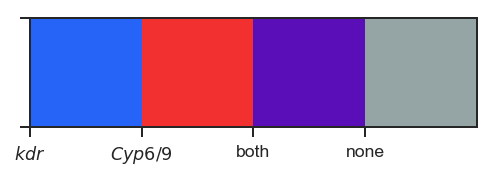

In [254]:
ir_lab = ['kdr', 'cyp', 'both', 'none']
ir_nm = ['$kdr$', '$Cyp6/9$', 'both', 'none']
#palette
flat = ["#2564f7", "#f23030", "#5a0eb7", "#95a5a6"]
palette = sns.color_palette(flat, n_colors=len(ir_nm))
# add a colour for other_resistant
sns.palplot(palette)
plt.gca().set_xticklabels(ir_nm);

In [255]:
# for legend
ir_colors = {l: c for l, c in zip(ir_nm, palette)}
ir_colors

{'$kdr$': (0.1450980392156863, 0.39215686274509803, 0.9686274509803922),
 '$Cyp6/9$': (0.9490196078431372, 0.18823529411764706, 0.18823529411764706),
 'both': (0.35294117647058826, 0.054901960784313725, 0.7176470588235294),
 'none': (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)}

In [256]:
def plot_shiny_map(fn=None, dpi=150):
    subplot_kw = dict(projection=crs_lonlat)
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=subplot_kw)
    ax.set_extent(extent_lonlat, crs=crs_lonlat)
    ax.imshow(data, cmap=color_map, extent=extent_lonlat, origin='upper', alpha=0.3)
    ax.coastlines(resolution='50m', linewidth=1.5, zorder=1)
    ax.add_feature(cfeature.BORDERS, linewidth=1.5, zorder=4)
    
    
    
        #add pies
    for _, row in df.iterrows():
        ratios = np.asarray([row[k]/row.num for k in ir_lab])
        ratios = np.append(ratios, 1 - np.sum(ratios))
       
        # wedgeprops is used here just to pass the zorder command
        centre = (row.lon + row.offset_lon, row.lat + row.offset_lat)
        #radius = np.sqrt(row.num * .02)
        radius=1.5
        
        ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=palette, center=centre, radius=radius, shadow=True)
        ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=2))

        
        lbl = row['pop']
        if row.label == 'bottom':
            ax.text(centre[0], centre[1] + (radius + (0.1 * radius)), lbl, ha='center', va='bottom', fontsize=12, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)
        if row.label == 'top':
            ax.text(centre[0], centre[1] - (radius + (0.1 * radius)), lbl, ha='center', va='top', fontsize=12, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)
   
        if row.offset_lat != 0 or row.offset_lon != 0:
            ax.plot([row.lon, row.lon + row.offset_lon],[row.lat, row.lat + row.offset_lat], 'k-', lw=2, zorder=5)
    
        
    #manual colour legend
    plt.text(-19.5, -4.3, 'Resistance genotype', fontsize=16,fontweight='bold')
    
    plt.plot([-16.5, -19.6],[-6, -6], color=ir_colors['$kdr$'], lw=10, zorder=20)
    plt.text(-15,-6.3, 'just $kdr$ SNP', fontsize=15 )
    
    plt.plot([-16.5, -19.6],[-8, -8], color=ir_colors['$Cyp6/9$'], lw=10, zorder=20)
    plt.text(-15,-8.3, 'just $Cyp6$ or $9$ dup.', fontsize=15 )
    
    plt.plot([-16.5, -19.6],[-10, -10], color=ir_colors['both'], lw=10, zorder=20)
    plt.text(-15,-10.3, 'both $kdr$ & $Cyp6/9$', fontsize=15 )
    
    plt.plot([-16.5, -19.6],[-12, -12], color=ir_colors['none'], lw=10, zorder=20)
    plt.text(-15,-12.3, 'none', fontsize=15 )
        
    #cover tiny island
    #plt.plot([-20, -10],[-7.8, -7.8], 'w', lw=20, zorder=18)
    ax.set_extent([-22, 48, -12, 15])

    if fn:
        fig.savefig(fn, jpeg_quality=100, dpi=dpi, bbox_inches='tight');

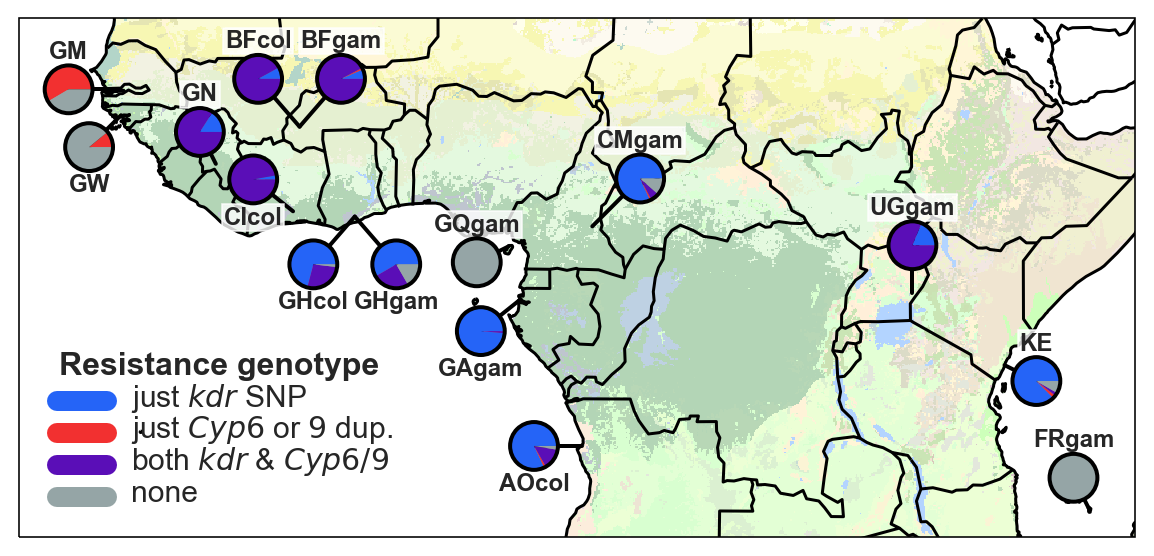

In [257]:
plot_shiny_map()

# TODO
- make a map which splits cyp6 and cyp9

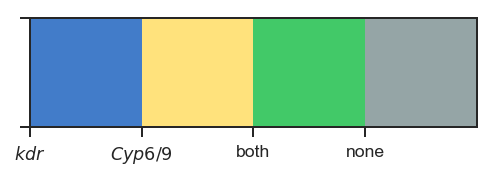

In [258]:
#palette
flat = ["#427cc9", "#ffe27c", "#42c968", "#95a5a6"]
palette = sns.color_palette(flat, n_colors=len(ir_nm))
# add a colour for other_resistant
sns.palplot(palette)
plt.gca().set_xticklabels(ir_nm);

In [259]:
# for legend
ir_colors = {l: c for l, c in zip(ir_nm, palette)}
ir_colors

{'$kdr$': (0.25882352941176473, 0.48627450980392156, 0.788235294117647),
 '$Cyp6/9$': (1.0, 0.8862745098039215, 0.48627450980392156),
 'both': (0.25882352941176473, 0.788235294117647, 0.40784313725490196),
 'none': (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)}

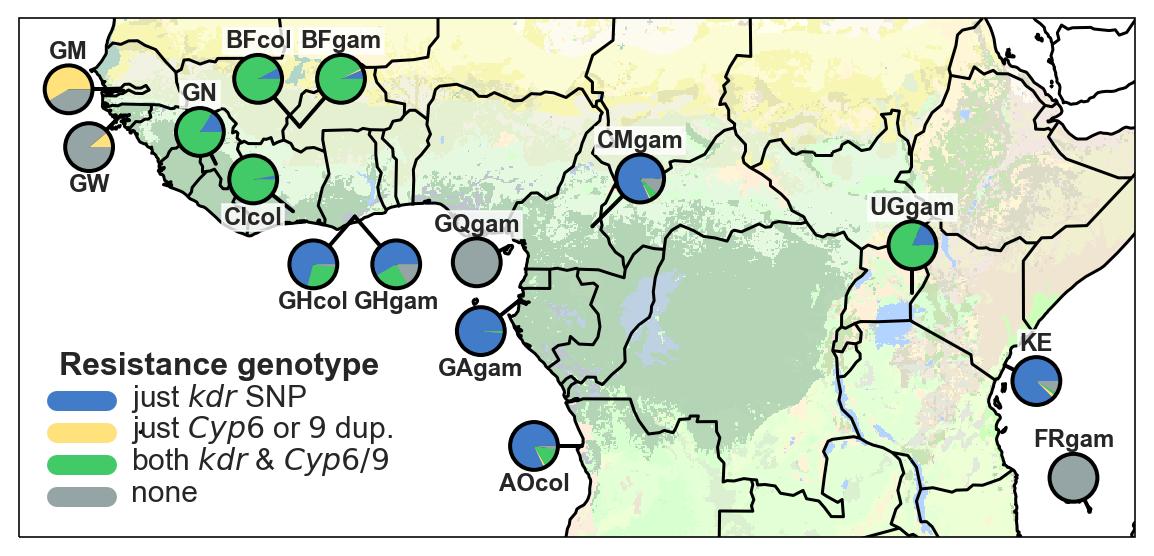

In [260]:
plot_shiny_map()

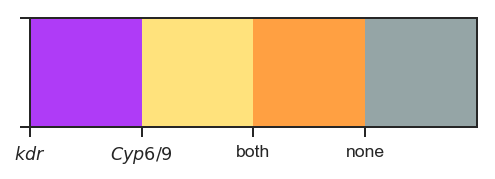

In [263]:
#palette
flat = ["#af3bf7",  "#ffe27c", "#ffa042","#95a5a6"]
palette = sns.color_palette(flat, n_colors=len(ir_nm))
# add a colour for other_resistant
sns.palplot(palette)
plt.gca().set_xticklabels(ir_nm);

In [264]:
# for legend
ir_colors = {l: c for l, c in zip(ir_nm, palette)}
ir_colors

{'$kdr$': (0.6862745098039216, 0.23137254901960785, 0.9686274509803922),
 '$Cyp6/9$': (1.0, 0.8862745098039215, 0.48627450980392156),
 'both': (1.0, 0.6274509803921569, 0.25882352941176473),
 'none': (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)}

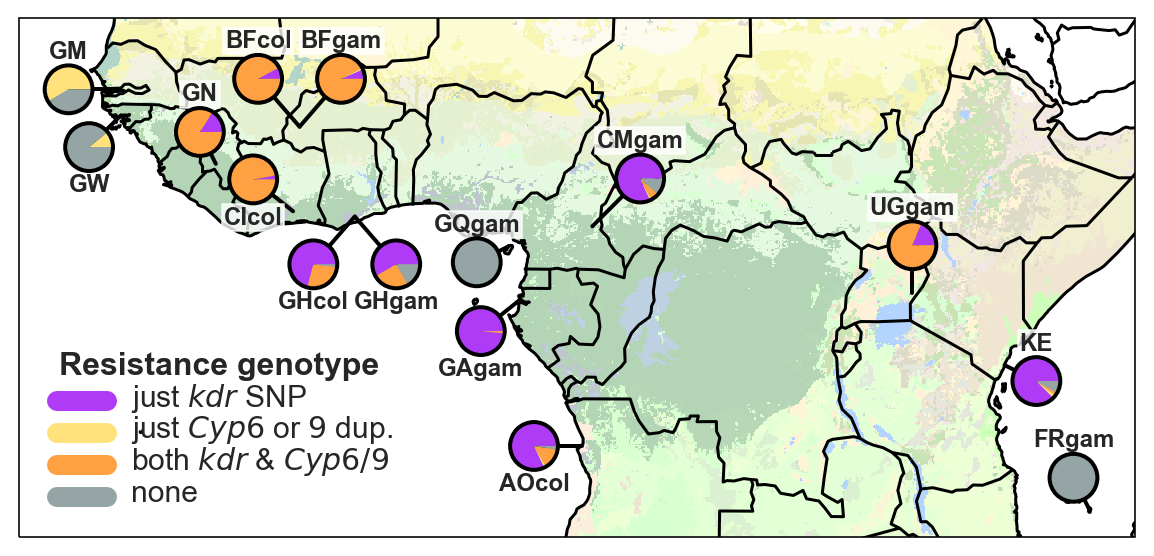

In [265]:
plot_shiny_map(fn='../artwork/pyrethroid_resistance_simplified.jpg')